# Introduction
Sales forecasting is one the most common tasks in many sales driven organizations. This activity enables organizations to adequately plan for the future with a degree of confidence. In this tutorial we’ll use Prophet, a package developed by Facebook to show how one can achieve this. This package is available in both Python and R. We assume that the reader has basic understanding of handling time series data in Python.
 
# Structure

* Downloading Data
* EDA & Data Preprocessing
* Model Fitting
* Making Future Predictions
* Obtaining the Forecasts
* Plotting the Forecasts
* Plotting the Forecast Components
* Cross Validation
* Obtaining the Performance Metrics
* Visualizing Performance Metrics
* Conclusion 




# Importing

In [ ]:
# fbProphet
!pip install pystan
!pip install fbprophet
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
# Yahoo Finance
!pip install yfinance
import yfinance as yf 
# Others
import pandas as pd
from plotly import graph_objs as go
from datetime import datetime

## Selecting a stock

In [ ]:
ySymbol="GOOG"

## Downloading Data From yfinance

In [ ]:
#for SymbolName in stocksymbols:
data = yf.download(
    # tickers list or string as well
    tickers = ySymbol,
    # use "period" instead of start/end
    # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # (optional, default is '1mo')
    period = "2y",
    # fetch data by interval (including intraday if period < 60 days)
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # (optional, default is '1d')
    interval = "1d",
    # group by ticker (to access via data['SPY'])
    # (optional, default is 'column')
    group_by = 'ticker',
    # adjust all OHLC(An open-high-low-close chart is a type of chart typically used to illustrate movements in the price of a financial instrument over time) automatically
    # (optional, default is False)
    auto_adjust = True,
    # download pre/post regular market hours data
    # (optional, default is False)
    prepost = True
    )

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2019-04-17,1233.000000,1240.560059,1227.819946,1236.339966,1221900
2019-04-18,1239.180054,1242.000000,1234.609985,1236.369995,1331800
2019-04-22,1235.989990,1249.089966,1228.310059,1248.839966,807300
2019-04-23,1250.689941,1269.000000,1246.380005,1264.550049,1319900
2019-04-24,1264.119995,1268.010010,1255.000000,1256.000000,1018800
...,...,...,...,...,...
2021-04-12,2266.250000,2275.320068,2238.465088,2254.790039,1565900
2021-04-13,2261.469971,2277.209961,2256.090088,2267.270020,1165500
2021-04-14,2275.159912,2277.989990,2249.189941,2254.840088,1011000


## Resetting Index

In [ ]:
data.reset_index(inplace=True)

# EDA & Data Preprocessing

## Plotting the Raw Data

In [ ]:
import plotly.offline as py

In [ ]:
py.iplot([go.Scatter(
    x=data['Date'],
    y=data['Close']
)])

## Fixing the dataset according to FBProphet

In [ ]:
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})
df_train.head()

,ds,y
0,2019-04-17,1236.339966
1,2019-04-18,1236.369995
2,2019-04-22,1248.839966
3,2019-04-23,1264.550049
4,2019-04-24,1256.000000


# Modelling

[Here](https://www.analyticsvidhya.com/blog/2018/05/generate-accurate-forecasts-facebook-prophet-python-r/) is a link if you want to understand about the model and parameters in detail.

In [ ]:
m = Prophet(daily_seasonality=True)
m.fit(df_train)

## Making Future Predictions

The next step is to prepare our model to make future predictions. This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

* periods: int no. of periods to forecast forward.

In [ ]:
future = m.make_future_dataframe(periods=2*365)

## Obtaining the Forecasts

 
We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [ ]:
forecast = m.predict(future)

## Plotting the Forecasts

Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset

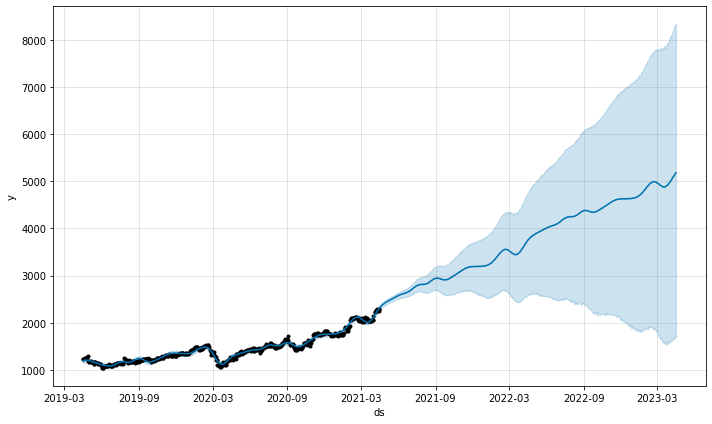

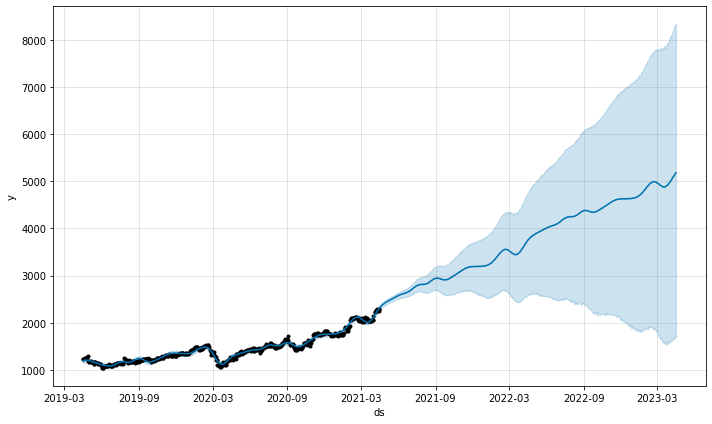

In [ ]:
m.plot(forecast)

In [ ]:
py.iplot([
    go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
])

## Plotting the Forecast Components

The plot_components method plots the trend, yearly and weekly seasonality of the time series data.

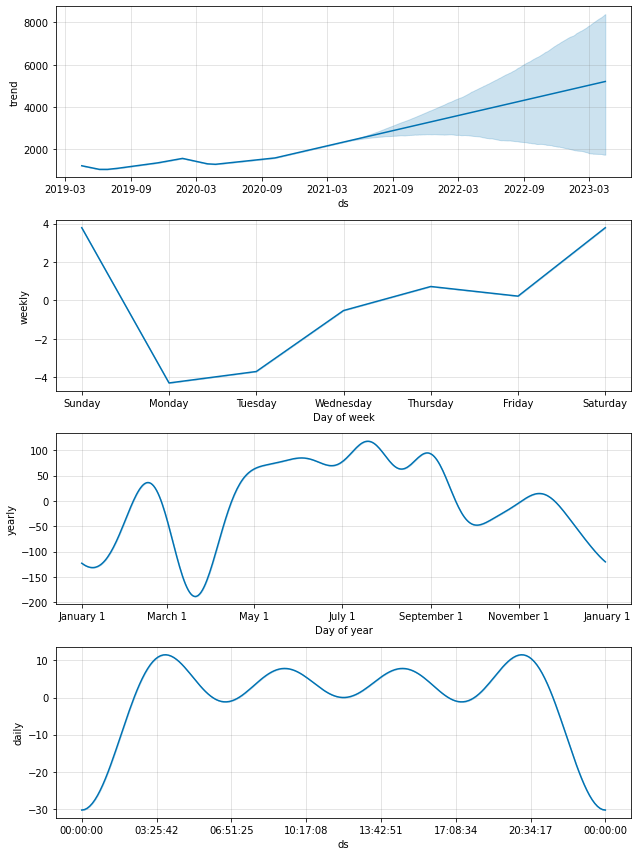

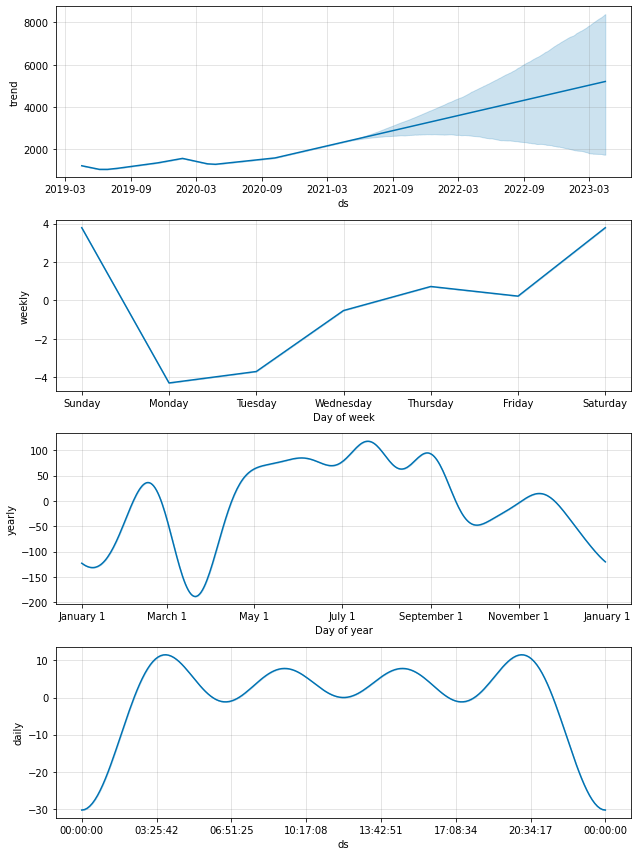

In [ ]:
#### Visualize Each Components[Trends,yearly]
m.plot_components(forecast)

## Cross Validation

 
Next let’s measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

* Horizon the forecast horizon.
* Initial the size of the initial training period.
* Period the spacing between cutoff dates.

The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors.

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
df_cv.head()

2021-04-19 05:34:45.219 INFO    fbprophet: Making 1 forecasts with cutoffs between 2020-04-16 00:00:00 and 2020-04-16 00:00:00
2021-04-19 05:34:45.224 WARNING fbprophet: Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-17,1253.741976,1224.796299,1285.253823,1283.250000,2020-04-16
1,2020-04-20,1247.795654,1220.349482,1275.171761,1266.609985,2020-04-16
2,2020-04-21,1247.561174,1216.454032,1278.010334,1216.339966,2020-04-16
3,2020-04-22,1244.606618,1216.076337,1275.172333,1263.209961,2020-04-16
4,2020-04-23,1242.959950,1212.998331,1270.554640,1276.310059,2020-04-16


## Obtaining the Performance Metrics
 
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,35 days,28452.325807,168.678172,143.780641,0.105430,0.122066,0.16
1,36 days,31612.603495,177.799335,153.905374,0.112525,0.122978,0.12
2,40 days,35371.335775,188.072687,165.437575,0.120601,0.140956,0.08
3,41 days,39227.059478,198.058222,176.670255,0.128377,0.143414,0.08
4,42 days,43134.326524,207.688051,188.449876,0.136628,0.148979,0.04
...,...,...,...,...,...,...,...
223,361 days,911725.296298,954.843074,951.977516,0.451417,0.460048,0.00
224,362 days,930273.642088,964.506942,962.283333,0.454329,0.460048,0.00
225,363 days,944656.190690,971.934252,970.151535,0.456393,0.460048,0.00
226,364 days,960757.606279,980.182435,978.693808,0.458401,0.460048,0.00


## Visualizing Performance Metrics

The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below

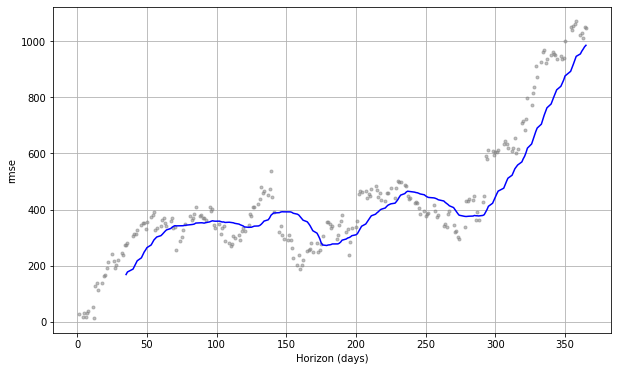

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

# Conclusion

 
As we have seen Prophet is very powerful and effective in time series forecasting.